In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import tensorflow as tf
import urllib, cStringIO
import glob
%matplotlib inline 

In [3]:
train_data = pd.read_csv('data/csv/train.csv')
test_data = pd.read_csv('data/csv/test.csv')

In [4]:
train_data.head()

id                                                url  \
0  cacf8152e2d2ae60  http://static.panoramio.com/photos/original/70...   
1  0a58358a2afd3e4e  http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...   
2  6b2bb500b6a38aa0  http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...   
3  b399f09dee9c3c67  https://lh3.googleusercontent.com/-LOW2cjAqubA...   
4  19ace29d77a5be66  https://lh5.googleusercontent.com/-tnmSXwQcWL8...   

   landmark_id  
0         4676  
1         6651  
2        11284  
3         8429  
4         6231

In [5]:
test_data.head()

id                                                url
0  000088da12d664db  https://lh3.googleusercontent.com/-k45wfamuhT8...
1  0001623c6d808702  https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2  0001bbb682d45002  https://lh3.googleusercontent.com/-kloLenz1xZk...
3  0002362830cfe3a3  https://lh3.googleusercontent.com/-N6z79jNZYTg...
4  000270c9100de789  https://lh3.googleusercontent.com/-keriHaVOq1U...

In [6]:
train_data.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

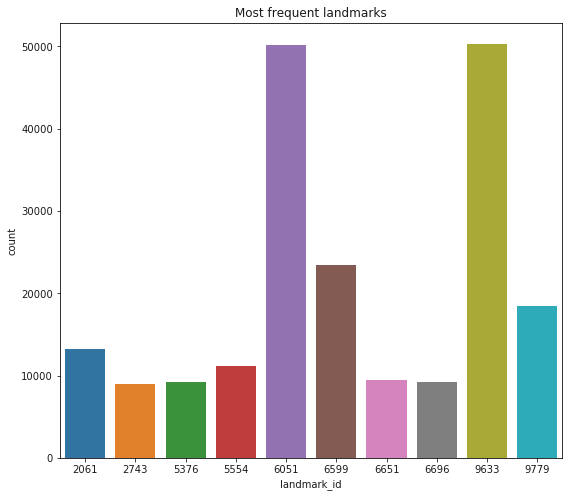

In [7]:
most_freq = pd.DataFrame(train_data.landmark_id.value_counts().head(10))
most_freq.reset_index(inplace=True)
most_freq.columns = ['landmark_id','count']
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=most_freq, label="Count")
plt.show()

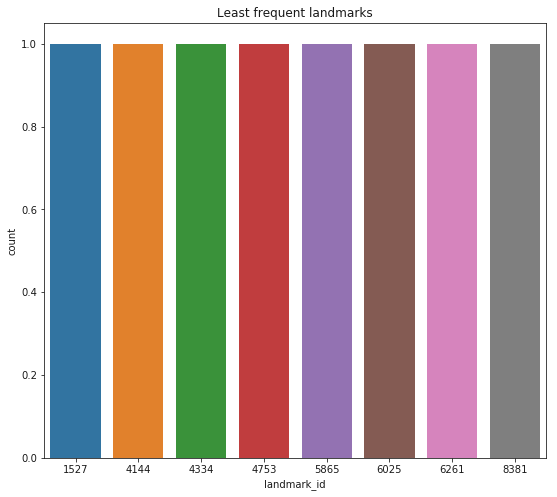

In [8]:
least_freq = pd.DataFrame(train_data.landmark_id.value_counts().tail(8))
least_freq.reset_index(inplace=True)
least_freq.columns = ['landmark_id','count']
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=least_freq,label="Count")
plt.show()

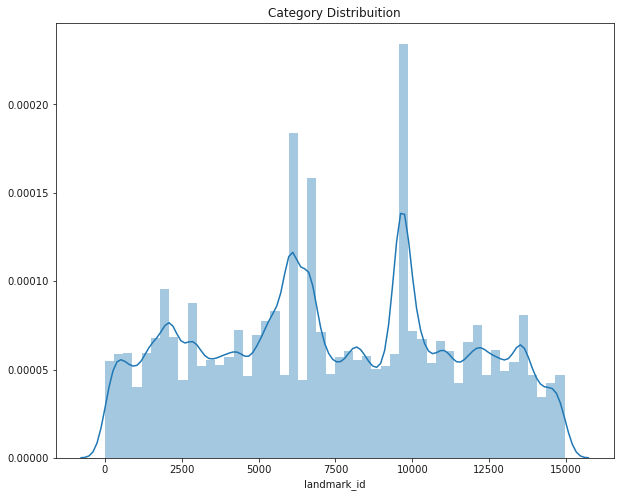

In [9]:
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])
plt.show()

In [9]:
file = cStringIO.StringIO(urllib.urlopen(train_data['url'][0]).read())
img = Image.open(file)

In [10]:
img_rand_bright = tf.image.random_brightness(img, max_delta=32. / 255.)
img_rand_sat = tf.image.random_saturation(img, lower=0.5, upper=1.5)
img_rand_hue = tf.image.random_hue(img, max_delta=0.2)
img_rand_contrast = tf.image.random_contrast(img, lower=0.5, upper=1.5)

In [11]:
img_rand_flip = tf.image.random_flip_left_right(img)